## Import dependencies

In [2]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.datasets import mnist
from keras import layers, Sequential

## Load the MNIST dataset from Keras

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

In [5]:
# normalization: scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# one-hot encoding: convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the model: 2 Conv2D + 2 FC

In [6]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu", strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              1

## Train the model

In [7]:
epochs = 12
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/12
1688/1688 [==============================] - 213s 126ms/step - loss: 0.1496 - accuracy: 0.9529 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 2/12
1688/1688 [==============================] - 209s 124ms/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0515 - val_accuracy: 0.9827
Epoch 3/12
1688/1688 [==============================] - 208s 123ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 4/12
1688/1688 [==============================] - 210s 124ms/step - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0305 - val_accuracy: 0.9912
Epoch 5/12
1688/1688 [==============================] - 217s 129ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0298 - val_accuracy: 0.9918
Epoch 6/12
1688/1688 [==============================] - 200s 119ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0250 - val_accuracy: 0.9930
Epoch 7/12
1688/1688 [==============================] - 197s 117ms/step - loss: 0.0252 - accuracy: 0.9923 - val_

## Evaluate the model

In [8]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 12s 39ms/step - loss: 0.0277 - accuracy: 0.9929
Test loss: 0.027654213830828667
Test accuracy: 0.992900013923645


## Confusion matrix for evaluating the accuracy of the ConvNet

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [ ]:
# make predictions
y_pred = model.predict(x_test)

# reverse the one-hot encoding
y_test = np.argmax(y_test, axis=1, out=None)
y_pred = np.argmax(y_pred, axis=1, out=None)

In [60]:
def plot_confusion_matrix(cm, classes, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues, 
                          rotation=0, 
                          figsize=(8,8),
                         fontsize=15):
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=fontsize)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=rotation, fontsize=fontsize)
    plt.yticks(tick_marks, classes, fontsize=fontsize)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], fontsize=fontsize,
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True class', fontsize=fontsize)
    plt.xlabel('Prediction', fontsize=fontsize)

In [26]:
labels = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(y_test, y_pred, labels=labels)

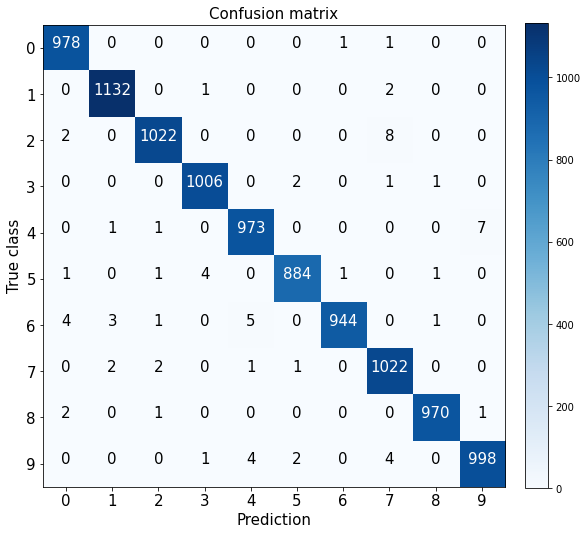

In [61]:
plot_confusion_matrix(cm=cm, classes=labels)